# **Sentiment Analysis of IMDB Movie Reviews**

#### Problem Statement:

In this, we have to predict the number of positive, neutral and negative reviews based on sentiments by using Logistic Regression.

In [1]:
# import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import csv file in your path
vn_reviews = pd.read_csv('C:/Users/ELCOT/Downloads/CSV Dataset/violent_ nature_reviews.csv')
vn_reviews.head()

,Comments,Ratings
0,Disclaimer: this film is only intended for sla...,7
1,I try to rate films for what they're suppose t...,6
2,In a violent nature is a slasher film shot mos...,5
3,Decent concept that just turns out insanely bo...,7
4,"This was scary, suspenseful, graphic and funny...",3


### **Exploratery data analysis**

In [3]:
vn_reviews.shape

(6900, 2)

In [4]:
vn_reviews.describe()

,Ratings
count,6900.000000
mean,5.173913
std,2.548026
min,1.000000
25%,3.000000
50%,6.000000
75%,7.000000
max,9.000000


In [5]:
vn_reviews.isnull().sum()

Comments    0
Ratings     0
dtype: int64

#### **Sentiment count**

In [6]:
vn_reviews.Ratings.value_counts()

Ratings
7    1500
6    1500
1    1200
8     900
3     600
4     300
5     300
2     300
9     300
Name: count, dtype: int64

#### **Data Visualization**

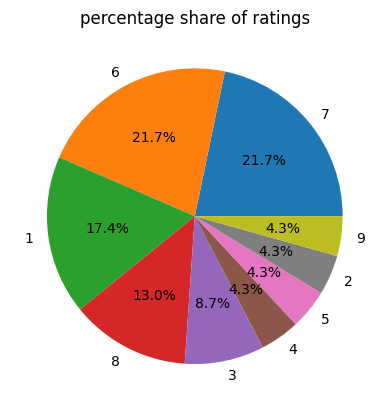

In [7]:
plt.pie(vn_reviews.Ratings.value_counts(), labels=[7,6,1,8,3,4,5,2,9], autopct='%1.1f%%')
plt.title('percentage share of ratings')
plt.show()

Minimum of the viewers of the movie 'in A Violent Nature' have reviewed as a good flim with the percentage of 4.3%

Based the value counts of the ratings, we can assume that the Positive ratings would be around ratings of 7,8,9
, the Neutral ratings of 4,5,6 stars and the negative ratings of 1,2,3 stars.

#Replacing the values of 7-9 as positive comments or 1
#values of 4-6 as neutral comments or 0
#values of 1-3 as negative comments or -1

In [8]:
vn={1:-1, 2:-1, 3:-1, 4:0, 5:0, 6:0, 7:1, 8:1, 9:1}
vn_reviews['Ratings']=vn_reviews['Ratings'].replace(vn)
vn_reviews['Ratings'].value_counts()

Ratings
 1    2700
 0    2100
-1    2100
Name: count, dtype: int64

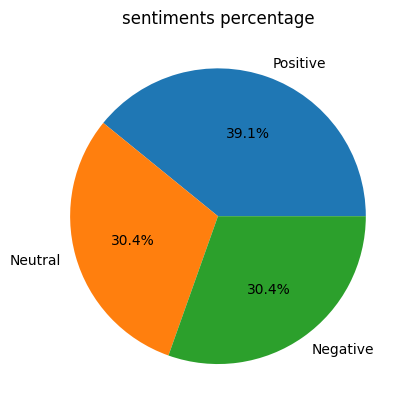

In [9]:
plt.pie(vn_reviews.Ratings.value_counts(),labels=['Positive','Neutral','Negative'], autopct='%1.1f%%')
plt.title('sentiments percentage')
plt.show()

### **Text preprocessing**

In [10]:
# import nltk libraries
import nltk,re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [35]:
nltk.download("All", quiet=True)

[nltk_data] Error loading All: Package 'All' not found in index


False

In [11]:
nltk.download("stopwords", quiet=True)

True

In [12]:
nltk.download("punkt", quiet=True)

True

In [13]:
nltk.download("averaged_perceptron_tagger", quiet=True)

True

In [14]:
nltk.download("wordnet", quiet=True)

True

In [15]:
#set stopwords to english
stops=stopwords.words('english')

# create your own variable for removing unwanted words
unwanted={'violent','nature','film','movie','violent nature'}

pattern = r'[^a-zA-Z0-9\s]'

lem=WordNetLemmatizer()

In [16]:
# using def function
def text_processing(text):
    clean_text=re.sub(pattern,' ',text)
    clean_text=clean_text.lower()
    clean_text=clean_text.split()
    clean_text=[lem.lemmatize(word) for word in clean_text if not word in stops and unwanted]
    clean_text=' '.join(clean_text)

    return clean_text

In [17]:
# apply function on review column
vn_reviews['clean_text']=vn_reviews['Comments'].apply(text_processing)

In [18]:
vn_reviews.sample(10)

,Comments,Ratings,clean_text
3969,"So wanted to like this movie. Too many long, d...",1,wanted like movie many long drawn sequence wal...
5392,Still recovering from what I just witnessed. I...,1,still recovering witnessed care couple hour li...
716,Decent concept that just turns out insanely bo...,1,decent concept turn insanely boring really muc...
1543,In a violent nature is a slasher film shot mos...,0,violent nature slasher film shot mostly perspe...
3305,We're used to the typical slasher-film dynamic...,-1,used typical slasher film dynamic tragedy happ...
2817,Of why non horror fans should not be allowed t...,0,non horror fan allowed leave review complete s...
5907,"""In a Violent Nature"" sets out with an intrigu...",-1,violent nature set intriguing premise slasher ...
285,A slasher film that strays from the usual scri...,-1,slasher film stray usual script follows slashe...
6835,"This was scary, suspenseful, graphic and funny...",-1,scary suspenseful graphic funny time completel...
2549,"""In a Violent Nature"" sets out with an intrigu...",-1,violent nature set intriguing premise slasher ...


In [19]:
# Selecting the feature and target values as x and y
x=vn_reviews['clean_text']
y=vn_reviews['Ratings']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3, stratify=y, random_state=42)

### Modelling using Bag of words technique

It is used to convert text documents to numerical vectors or bag of words.

In [21]:
bow=CountVectorizer()
x_train_bow=bow.fit_transform(x_train)
x_test_bow=bow.transform(x_test)

Let us build logistic regression model for bag of words 

In [22]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=100)

In [23]:
model.fit(x_train_bow,y_train)

LogisticRegression()

### Model performance on test data

In [24]:
y_pred_train=model.predict(x_train_bow)
y_pred_test=model.predict(x_test_bow)
print(y_pred_train, y_pred_test)

[-1  0  1 ... -1 -1  1] [1 0 1 ... 1 0 1]


In [25]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

### Print the Classification Report

In [26]:
print(classification_report(y_pred_train,y_train))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1470
           0       1.00      1.00      1.00      1470
           1       1.00      1.00      1.00      1890

    accuracy                           1.00      4830
   macro avg       1.00      1.00      1.00      4830
weighted avg       1.00      1.00      1.00      4830



### Accuracy of the model

In [27]:
print(accuracy_score(y_pred_train,y_train))

1.0


###  Plot the Confusion Matrix

In [28]:
print(confusion_matrix(y_pred_train,y_train))

[[1470    0    0]
 [   0 1470    0]
 [   0    0 1890]]


In [29]:
#Splitting the data based on the sentiments
positive_data=vn_reviews[vn_reviews['Ratings']==1]
neutral_data=vn_reviews[vn_reviews['Ratings']==0]
negative_data=vn_reviews[vn_reviews['Ratings']==-1]

### Let us see positive, neutral and negative words by using WordCloud.

In [30]:
from wordcloud import WordCloud

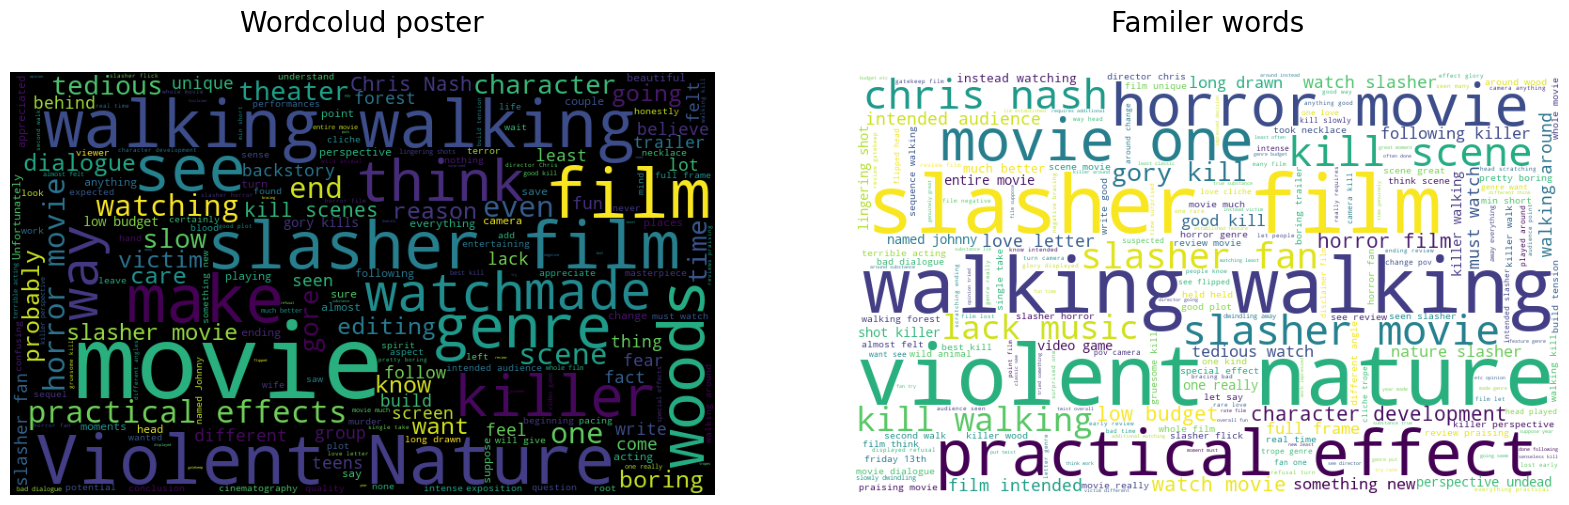

In [31]:
org_words=' '.join([sentence for sentence in vn_reviews['Comments']])
new_words=' '.join([sentence for sentence in vn_reviews['clean_text']])

#Declaring the wordcloud
rc= WordCloud(width=750, height=450, random_state=21, max_font_size=110)
pc= WordCloud(width=750, height=450, random_state=21, background_color='white', max_font_size=110,)

#fitting teh wordcloud
result1=rc.generate(org_words)
result2=pc.generate(new_words)


fig,axis=plt.subplots(1,2,figsize=(20,10))
axis[0].imshow(result1)
axis[0].set_title('Wordcolud poster\n', fontsize=20)
axis[0].axis('off')

axis[1].imshow(result2)
axis[1].set_title('Familer words\n', fontsize=20)
axis[1].axis('off')

plt.show()

### **Wordcloud for Positive Comments**

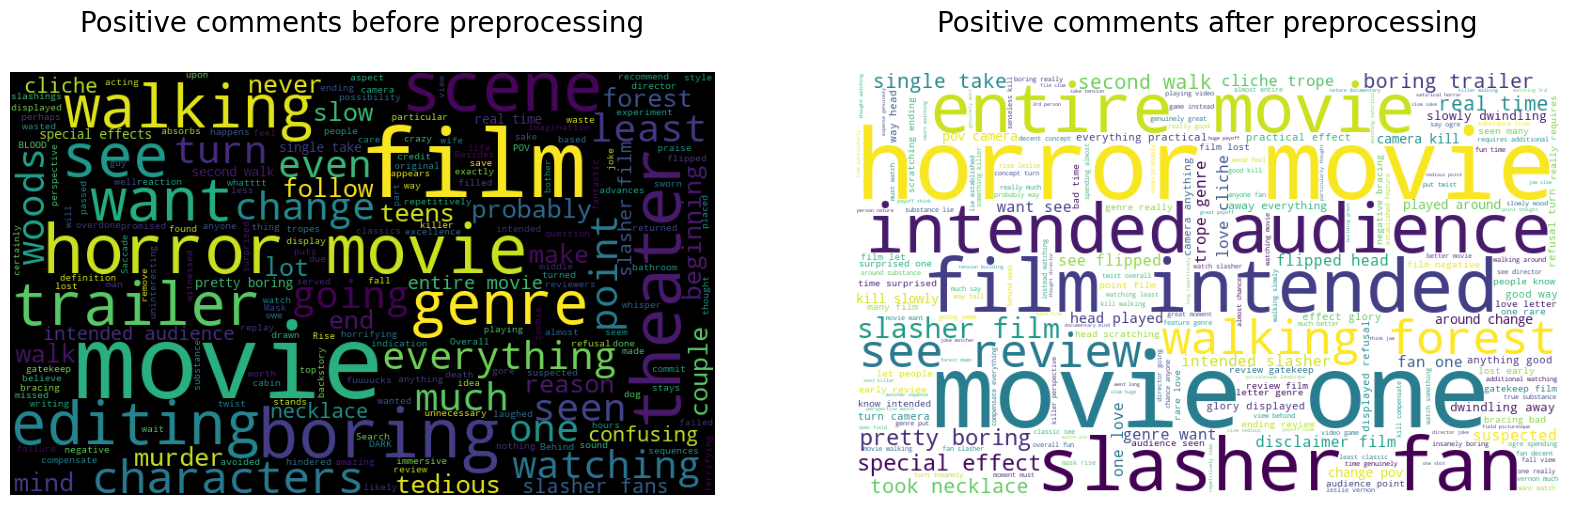

In [32]:
org_words=' '.join([sentence for sentence in positive_data['Comments']])
new_words=' '.join([sentence for sentence in positive_data['clean_text']])
positive_data
rc= WordCloud(width=750, height=450, random_state=21, max_font_size=110)
pc= WordCloud(width=750, height=450, random_state=21, background_color='white', max_font_size=110,)

result1=rc.generate(org_words)
result2=pc.generate(new_words)

fig,axis=plt.subplots(1,2,figsize=(20,10))
axis[0].imshow(result1)
axis[0].set_title('Positive comments before preprocessing\n', fontsize=20)
axis[0].axis('off')

axis[1].imshow(result2)
axis[1].set_title('Positive comments after preprocessing\n', fontsize=20)
axis[1].axis('off')

plt.show()

### **Wordcloud for Negative Comments**

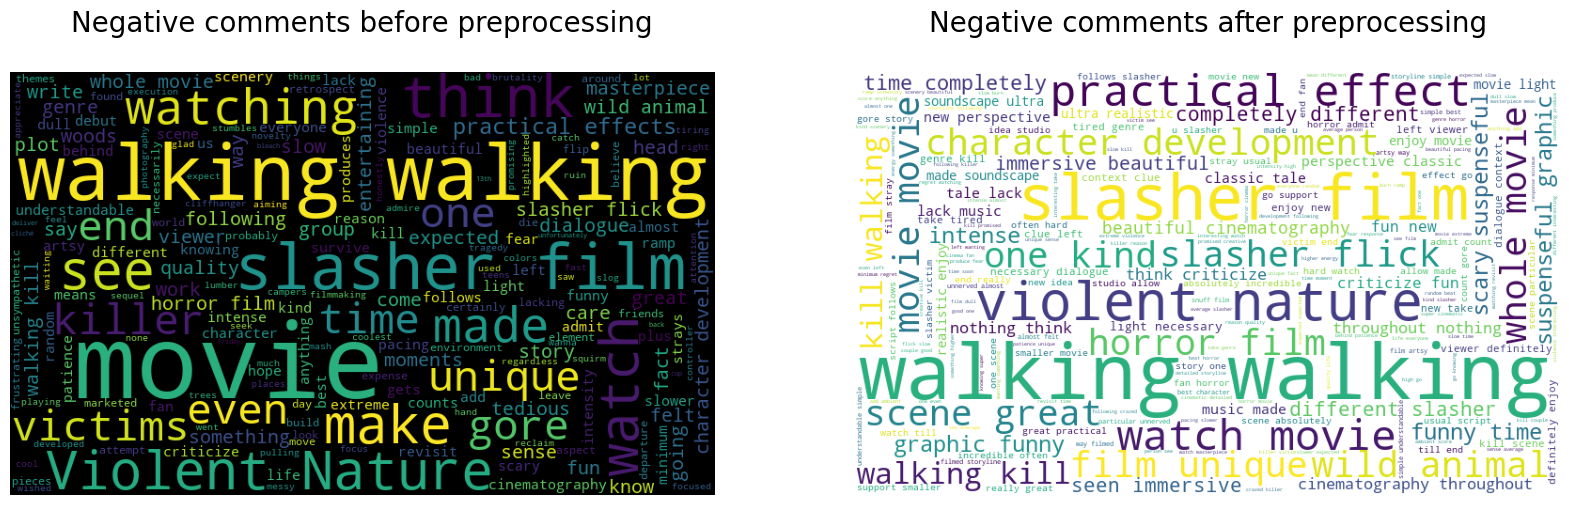

In [33]:
org_words=' '.join([sentence for sentence in negative_data['Comments']])
new_words=' '.join([sentence for sentence in negative_data['clean_text']])
positive_data
rc= WordCloud(width=750, height=450, random_state=21, max_font_size=110)
pc= WordCloud(width=750, height=450, random_state=21, background_color='white', max_font_size=110,)

result1=rc.generate(org_words)
result2=pc.generate(new_words)

fig,axis=plt.subplots(1,2,figsize=(20,10))
axis[0].imshow(result1)
axis[0].set_title('Negative comments before preprocessing\n', fontsize=20)
axis[0].axis('off')

axis[1].imshow(result2)
axis[1].set_title('Negative comments after preprocessing\n', fontsize=20)
axis[1].axis('off')

plt.show()

### **Wordcloud for Neutral Comments**

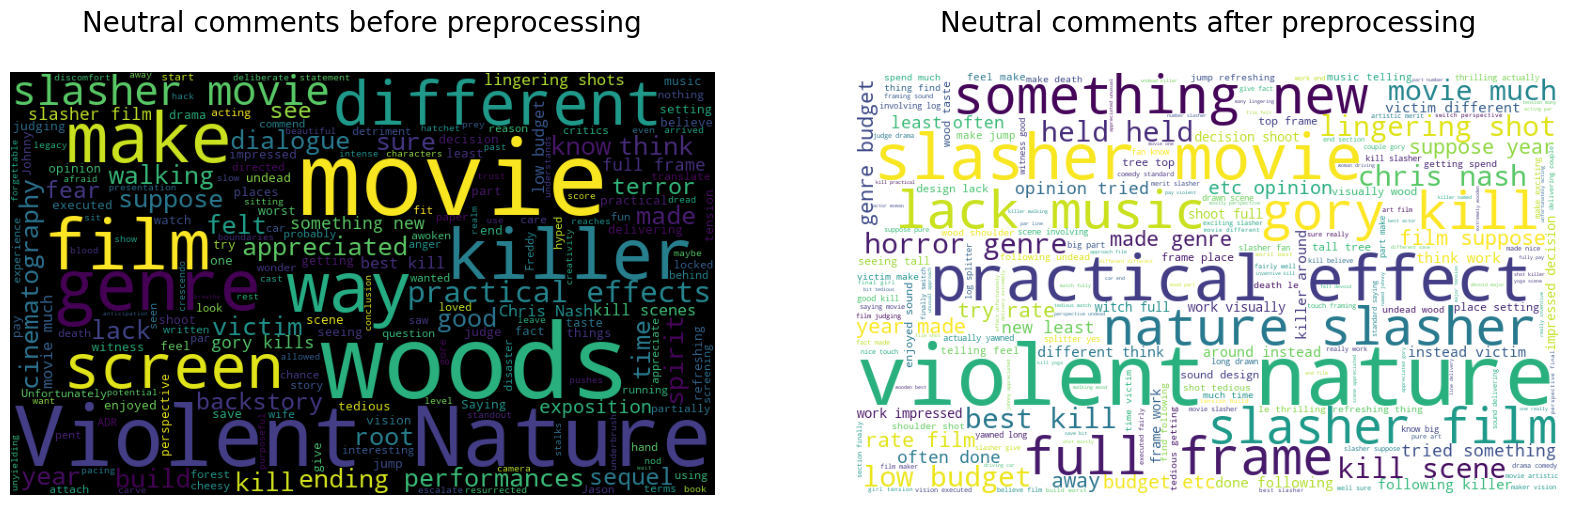

In [34]:
org_words=' '.join([sentence for sentence in neutral_data['Comments']])
new_words=' '.join([sentence for sentence in neutral_data['clean_text']])
positive_data
rc= WordCloud(width=750, height=450, random_state=21, max_font_size=110)
pc= WordCloud(width=750, height=450, random_state=21, background_color='white', max_font_size=110,)

result1=rc.generate(org_words)
result2=pc.generate(new_words)

fig,axis=plt.subplots(1,2,figsize=(20,10))
axis[0].imshow(result1)
axis[0].set_title('Neutral comments before preprocessing\n', fontsize=20)
axis[0].axis('off')

axis[1].imshow(result2)
axis[1].set_title('Neutral comments after preprocessing\n', fontsize=20)
axis[1].axis('off')

plt.show()

### **Conclusion**

The above word cloud images represents the word frequency of the respective positive, neutral and negative comments of the reviewers in IMDb platform. Overall, the film is thrilling  and frightened. 

Based the comments of the reviewers, many of the viwevwers mentioned that this movie represent like one kind slasher flick. Director and their team of 'in A Violent Nature' effect was good.

The analysis represents the sentimenatal analysis using logistic regression with accuracy of 100%.